# Числено решаване на уравнения

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, symbols, diff, solve, Eq, sin, cos
import sympy

### Метод на разполовяването (бисекцията)

1) Ограничаваме търсения корен в някакъв краен интервал $[a, b]$, за който е в сила $f(a)f(b) < 0$;

2) Пресмятаме $f(\frac{a + b}{2})$:

    A) Ако $f(\frac{a + b}{2}) < 0$, избираме $b = \frac{a + b}{2}$;\
    Б) В противен случай, избираме $a = \frac{a + b}{2}$;

3) Повтаряме тези стъпки, докато дължината на интервала $[a, b]$ стане по-малка от някакво предварително зададено число $\epsilon$;

4) За краен резултат избираме кое да е от числата $a$  или  $b$.

### Метод на Нютон

1) Избираме $x_0$ - начално приближение на търсения корен;

2) Построяваме редица от вида

    $x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}, \quad i = 0, 1, 2, \dots$;

3) Продължаваме построяването на редицата докато едно от следните две не е изпълнено:\
    А) Достигане на предварително зададен максимален брой итерации;\
    Б) Разликата между две съседни приближения от редицата 
    $x_i$ и $x_{i+1}$ стане по-малка от някакъв предвартиелно зададен толеранс $\epsilon$;
    
4) За краен резултат избираме последното получено число от редицата.

### Задача 1

Да се намери корен на уравнението

$e^x - 3 = 0$

в интервала $[0,3]$, с грешка, ненадминаваща $\epsilon = 0.00001$.

За целта да се използват а) метода на Нютон; б) метода на разполовяването.
Да се определи броят на итерациите, необходими на всеки от двата метода за получаване на посочената точност.
Да се сравни с точното решение.

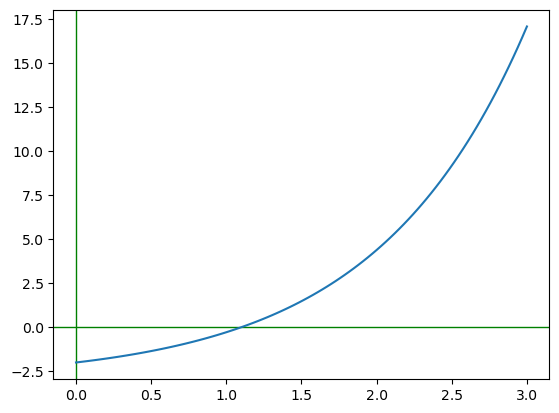

In [42]:
def f(x):
    return np.e ** x - 3

epsilon = 0.00001

a = 0
b = 3

x = Symbol('x')
derivateI = diff(f(x), x)

x_axis = np.linspace(a, b, 100)
plt.axhline(0, color='green', linewidth=1)  # x-axis (Ox)
plt.axvline(0, color='green', linewidth=1)  # y-axis (Oy)
plt.plot(x_axis, f(x_axis))
plt.show()

In [24]:
#Newton
newton_iterations = 0

x0 = 2
xi = 0

while True:
    xi = x0 - f(x0) / derivateI.subs(x, x0)
    if abs(xi - x0) < epsilon:
        break
    x0 = xi
    newton_iterations += 1

print("Newton's iterations:", newton_iterations)

Newton's iterations: 4


In [44]:
#Bisections
bisection_iterations = 0

while np.abs(b - a) > epsilon:
    if f((a + b) / 2) < 0:
        b = (a + b) / 2
    else:
        a = (a + b) / 2
    bisection_iterations += 1

print("Bisections iterations:", bisection_iterations)

Bisections iterations: 19


### Задача 2

Като се използва метода на Нютон, да се намерят приближено корени на уравненията 
* $\cos(x) = x$ в интервала $[0, 1], x_0 = 0$;
* $e^x = x^4$ в интервалите $[-1.5, -0.5]$, $[0.5, 1.5]$ и $[7, 9]$. Началните приближения да се изберат от графиката на функцията;
* $ x(x−1)(x+1) = 0 $ в интервала $[0.55, 1.1], x_0 = 0.55$;
* $ 2^x = \tan(x)$, в интервала $[-0.2, 1.4], x_0 = -0.2$;
* $x^3 - 5x = 0$ в интервала $[-0.1, 1]$, $x_0 = 1$;
* $ x^3 - 3x + 1 = 0$ в интервала $[1, 2], x_0 = 1$;
* $2 + x ^ 3 - x - \sin(x) = 0$ в интервала $[-2,2], x_0 = 0$. 

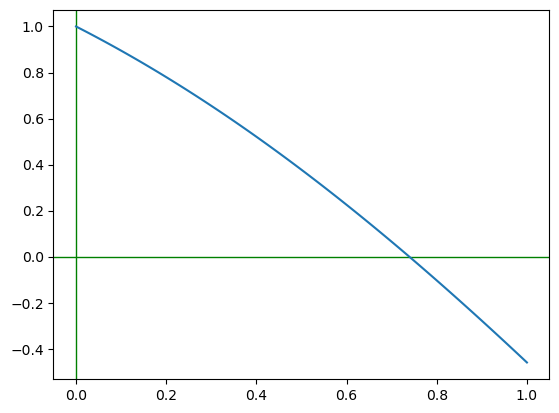

0.739085133215161


In [74]:
def f(x):
    return np.cos(x) - x

a = 0
b = 1
x0 = 0
xi = 0

x = Symbol('x')
derivateI = -sin(x) - 1

x_axis = np.linspace(a, b, 100)
plt.axhline(0, color='green', linewidth=1)  # x-axis (Ox)
plt.axvline(0, color='green', linewidth=1)  # y-axis (Oy)
plt.plot(x_axis, f(x_axis))
plt.show()

while True:
    xi = x0 - f(float(x0)) / derivateI.subs(x, x0)
    if abs(xi - x0) < epsilon:
        break
    x0 = xi

print(xi)

In [11]:
def newton(x0, xi, epsilon):
    while True:
        xi = x0 - f(x0) / derivateI.subs(x, x0)
        if abs(xi - x0) < epsilon:
            break
        x0 = xi
    return xi

def f(x):
    return np.e**x - x ** 4

x = Symbol('x')
derivateI = diff(sympy.exp(x) - x**4, x)

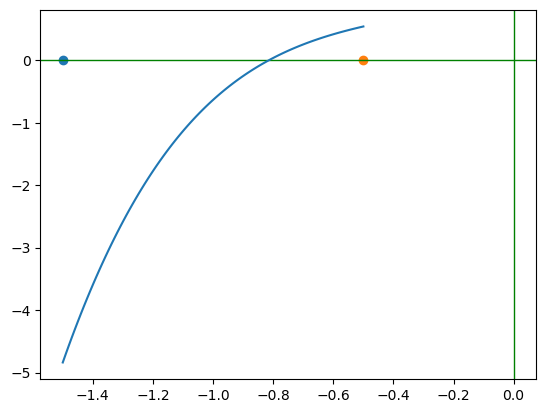

-0.815553418844074


In [13]:
a = -1.5
b = -0.5


x_axis = np.linspace(a, b, 100)
plt.axhline(0, color='green', linewidth=1)  # x-axis (Ox)
plt.axvline(0, color='green', linewidth=1)  # y-axis (Oy)
plt.plot(x_axis, f(x_axis))
plt.scatter(a, 0)
plt.scatter(b,0)
plt.show()

x0 = xi = -0.5
epsilon = 10**(-5)
res = newton(x0, xi, epsilon)
print(res)

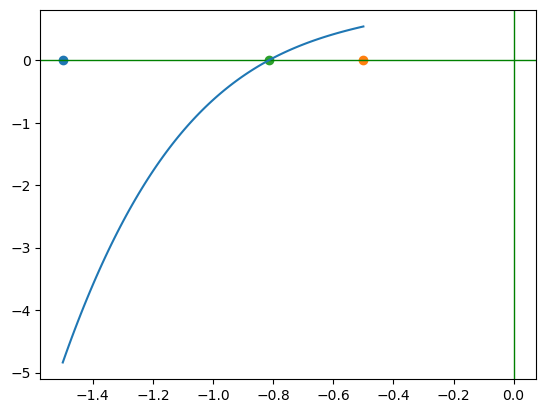

In [15]:
x_axis = np.linspace(a, b, 100)
plt.axhline(0, color='green', linewidth=1)  # x-axis (Ox)
plt.axvline(0, color='green', linewidth=1)  # y-axis (Oy)
plt.plot(x_axis, f(x_axis))
plt.scatter(a, 0)
plt.scatter(b,0)
plt.scatter(res, 0)
plt.show()

In [ ]:
a = 0.5
b = 1.5
x0 = xi = 0.5
epsilon =  10**-5
result = newton(x0, xi, epsilon)
print(result)

In [ ]:

x_axis = np.linspace(a, b, 100)
plt.axhline(0, color='green', linewidth=1)  # x-axis (Ox)
plt.axvline(0, color='green', linewidth=1)  # y-axis (Oy)
plt.plot(x_axis, f(x_axis))
plt.scatter(a, 0)
plt.scatter(b,0)
plt.scatter(result, 0)
plt.show()
a = 7
b = 9